In [15]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
import seaborn as sns
from scipy import stats
from scipy.stats import norm

In [16]:
import seaborn as sns


In [17]:
train=pd.read_csv("/home/hp/Downloads/train.csv")

In [18]:
test=pd.read_csv("/home/hp/Downloads/test.csv")

In [19]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [20]:
train.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [21]:
train.columns[train.isnull().any()]

Index([u'LotFrontage', u'Alley', u'MasVnrType', u'MasVnrArea', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinType2',
       u'Electrical', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish', u'GarageQual', u'GarageCond', u'PoolQC', u'Fence',
       u'MiscFeature'],
      dtype='object')

In [22]:
miss=train.isnull().sum()/len(train)

In [23]:
miss=miss[miss>0]

In [24]:
miss.sort_values(inplace=True)

In [25]:
miss

Electrical      0.000685
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
BsmtExposure    0.026027
BsmtFinType2    0.026027
GarageCond      0.055479
GarageQual      0.055479
GarageFinish    0.055479
GarageType      0.055479
GarageYrBlt     0.055479
LotFrontage     0.177397
FireplaceQu     0.472603
Fence           0.807534
Alley           0.937671
MiscFeature     0.963014
PoolQC          0.995205
dtype: float64

AttributeError: 'module' object has no attribute 'plt'

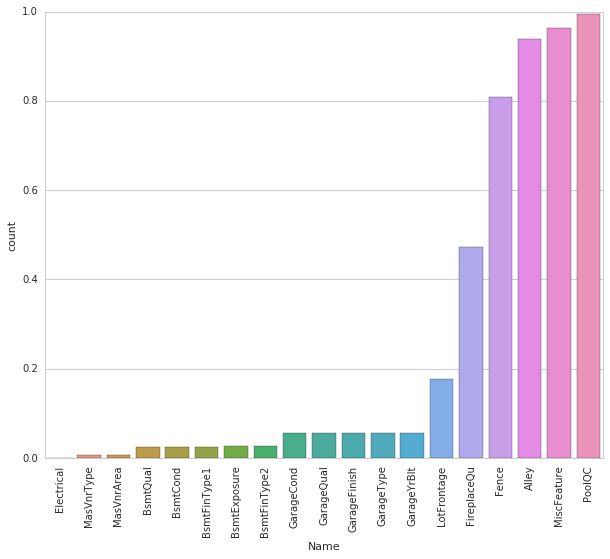

In [26]:
#visualising missing values
miss = miss.to_frame()
miss.columns = ['count']
miss.index.names = ['Name']
miss['Name'] = miss.index

#plot the missing value count
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'Name', y = 'count', data=miss)
plt.xticks(rotation = 90)
sns.plt.show()



In [ ]:
sns.distplot(train['SalePrice'])

In [ ]:
train['SalePrice'].skew()

In [ ]:
target=np.log(train['SalePrice'])
target.skew()
sns.distplot(target)

In [ ]:
target.skew()

In [ ]:
numeric_data=train.select_dtypes(include=[np.number])
categorical_data=train.select_dtypes(exclude=[np.number])


In [ ]:
numeric_data.shape


In [ ]:
categorical_data.shape

In [ ]:
del numeric_data['Id']

In [ ]:
numeric_data.shape

In [ ]:
corr=numeric_data.corr()

In [ ]:
corr

In [ ]:
sns.heatmap(corr)

In [ ]:
corr['SalePrice'].sort_values(ascending=False)[:15]

In [ ]:
corr['SalePrice'].sort_values(ascending=True)[0:5]

In [ ]:
train['OverallQual'].unique()

In [ ]:
pivot=train.pivot_table(index='OverallQual',values='SalePrice',aggfunc=np.median)
pivot.sort

In [ ]:
sns.jointplot(x=train['GrLivArea'], y=train['SalePrice'])

In [ ]:
categorical_data.describe()

In [ ]:
sp_pivot=train.pivot_table(index='SaleCondition', values='SalePrice', aggfunc=np.median)

In [ ]:
sp_pivot

In [ ]:
sp_pivot.plot(kind='bar', color='red')

In [ ]:
cat=[f for f in train.columns if train.dtypes[f]=='object']

In [ ]:
cat

In [ ]:
len(cat)

In [ ]:
def anova(frame):
    anv=pd.DataFrame()
    anv['features']=cat
    pvals=[]
    for c in cat:
        samples=[]
        for cls in frame[c].unique():
            s=frame[frame[c]==cls]['SalePrice'].values
            samples.append(s)
        pval=stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval']=pvals
    return anv.sort_values('pval')

In [ ]:
categorical_data['SalePrice']=train.SalePrice.values
k=anova(categorical_data)
k['disparity']=np.log(1./k['pval'].values)
sns.barplot(data=k, x='features', y='disparity')
plt.xticks(rotation=90)
plt

In [ ]:
num=[f for f in train.columns if train.dtypes[f]!='object']
num.remove('Id')
nd=pd.melt(train, value_vars=num)
nd

In [ ]:
n1=sns.FacetGrid(nd, col='variable', col_wrap=4, sharex=False, sharey=False)
n1=n1.map(sns.distplot, 'value')
n1

In [ ]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)

In [ ]:
cat=[f for f in train.columns if train.dtypes[f]=='object']

In [ ]:
cat

In [ ]:
p=pd.melt(train, id_vars='SalePrice', value_vars=cat)

In [ ]:
p

In [ ]:
g=sns.FacetGrid(p, col='variable', col_wrap=2, sharex=False, sharey=False, size=5)

In [ ]:
g = g.map(boxplot, 'value','SalePrice')

In [ ]:
sns.jointplot(x=train['GrLivArea'],y=train['SalePrice'])

In [ ]:
train.drop(train[train['GrLivArea']>4000].index, inplace=True)

In [ ]:
train.shape

In [ ]:
stats.mode(test['GarageQual']).mode

In [ ]:
np.nanmedian(test['GarageYrBlt'])

In [ ]:
test.loc[666,'GarageCond']="TA"
test.loc[666, 'GarageCond']="TA"
test.loc[666, 'GarageFinish']="Unf"
test.loc[666, 'GarageYrBlt']="1979"

In [ ]:
test.loc[1116, 'GarageType']=np.nan

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
def factorize(data, var, fill_na=None):
    if fill_na is not None:
        data[var].fillna(fill_na, inplace=True)
    le.fit(data[var])
    data[var]=le.transform(data[var])
    return data


In [ ]:
alldata=train.append(test)

In [ ]:
alldata.shape

In [ ]:
np.sum(train['LotFrontage'].isnull())

In [ ]:
lot_frontage_by_neighborhood=train['LotFrontage'].groupby(train['Neighborhood'])

In [ ]:
lot_frontage_by_neighborhood

In [ ]:
for key, group in lot_frontage_by_neighborhood:
    idx=(alldata['Neighborhood']==key) & (alldata['LotFrontage'].isnull())
    alldata.loc[idx, 'LotFrontage']=group.median()

In [ ]:
alldata["MasVnrArea"].fillna(0, inplace=True)
alldata["BsmtFinSF1"].fillna(0, inplace=True)
alldata["BsmtFinSF2"].fillna(0, inplace=True)
alldata["BsmtUnfSF"].fillna(0, inplace=True)
alldata["TotalBsmtSF"].fillna(0, inplace=True)
alldata["GarageArea"].fillna(0, inplace=True)
alldata["BsmtFullBath"].fillna(0, inplace=True)
alldata["BsmtHalfBath"].fillna(0, inplace=True)
alldata["GarageCars"].fillna(0, inplace=True)
alldata["GarageYrBlt"].fillna(0.0, inplace=True)
alldata["PoolArea"].fillna(0, inplace=True)

In [ ]:
qual_dict={np.nan: 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex':5}
name=np.array(['ExterQual','PoolQC' ,'ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu', 'GarageQual','GarageCond'])

In [ ]:
for i in name:
    alldata[i]=alldata[i].map(qual_dict).astype('int')

In [ ]:
alldata["BsmtExposure"] = alldata["BsmtExposure"].map({np.nan: 0, "No": 1, "Mn": 2, "Av": 3, "Gd": 4}).astype(int)

In [ ]:
bsmt_fin_dict = {np.nan: 0, "Unf": 1, "LwQ": 2, "Rec": 3, "BLQ": 4, "ALQ": 5, "GLQ": 6}
alldata["BsmtFinType1"] = alldata["BsmtFinType1"].map(bsmt_fin_dict).astype(int)
alldata["BsmtFinType2"] = alldata["BsmtFinType2"].map(bsmt_fin_dict).astype(int)
alldata["Functional"] = alldata["Functional"].map({np.nan: 0, "Sal": 1, "Sev": 2, "Maj2": 3, "Maj1": 4, "Mod": 5, "Min2": 6, "Min1": 7, "Typ": 8}).astype(int)

alldata["GarageFinish"] = alldata["GarageFinish"].map({np.nan: 0, "Unf": 1, "RFn": 2, "Fin": 3}).astype(int)
alldata["Fence"] = alldata["Fence"].map({np.nan: 0, "MnWw": 1, "GdWo": 2, "MnPrv": 3, "GdPrv": 4}).astype(int)

In [ ]:
alldata["CentralAir"] = (alldata["CentralAir"] == "Y") * 1.0

In [ ]:
varst = np.array(['MSSubClass','LotConfig','Neighborhood','Condition1','BldgType','HouseStyle','RoofStyle','Foundation','SaleCondition'])

In [ ]:
for x in varst:
         factorize(alldata, x)

In [ ]:
alldata.head()


In [ ]:
alldata.describe()

In [ ]:
alldata = factorize(alldata, "MSZoning", "RL")
alldata = factorize(alldata, "Exterior1st", "Other")
alldata = factorize(alldata, "Exterior2nd", "Other")
alldata = factorize(alldata, "MasVnrType", "None")
alldata = factorize(alldata, "SaleType", "Oth")

In [ ]:
alldata.describe()

In [ ]:
alldata["IsRegularLotShape"] = (alldata["LotShape"] == "Reg") * 1
alldata["IsLandLevel"] = (alldata["LandContour"] == "Lvl") * 1
alldata["IsLandSlopeGentle"] = (alldata["LandSlope"] == "Gtl") * 1
alldata["IsElectricalSBrkr"] = (alldata["Electrical"] == "SBrkr") * 1
alldata["IsGarageDetached"] = (alldata["GarageType"] == "Detchd") * 1
alldata["IsPavedDrive"] = (alldata["PavedDrive"] == "Y") * 1
alldata["HasShed"] = (alldata["MiscFeature"] == "Shed") * 1
alldata["Remodeled"] = (alldata["YearRemodAdd"] != alldata["YearBuilt"]) * 1

#Did the modeling happen during the sale year?
alldata["RecentRemodel"] = (alldata["YearRemodAdd"] == alldata["YrSold"]) * 1

# Was this house sold in the year it was built?
alldata["VeryNewHouse"] = (alldata["YearBuilt"] == alldata["YrSold"]) * 1
alldata["Has2ndFloor"] = (alldata["2ndFlrSF"] == 0) * 1
alldata["HasMasVnr"] = (alldata["MasVnrArea"] == 0) * 1
alldata["HasWoodDeck"] = (alldata["WoodDeckSF"] == 0) * 1
alldata["HasOpenPorch"] = (alldata["OpenPorchSF"] == 0) * 1
alldata["HasEnclosedPorch"] = (alldata["EnclosedPorch"] == 0) * 1
alldata["Has3SsnPorch"] = (alldata["3SsnPorch"] == 0) * 1
alldata["HasScreenPorch"] = (alldata["ScreenPorch"] == 0) * 1

In [ ]:
allData["MoSold"].value_counts()

In [ ]:
alldata["MoSold"].value_counts()

In [ ]:
alldata["MoSold"].value_counts().sort_by(asc=false)

In [ ]:
alldata["HighSeason"] = alldata["MoSold"].replace({1: 0, 2: 0, 3: 0, 4: 1, 5: 1, 6: 1, 7: 1, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0})

In [ ]:
alldata['MSSubClass'].value_counts()

In [ ]:
alldata["NewerDwelling"] = alldata["MSSubClass"].replace({20: 1, 30: 0, 40: 0, 45: 0,50: 0, 60: 1, 70: 0, 75: 0, 80: 0, 85: 0,90: 0, 120: 1, 150: 0, 160: 0, 180: 0, 190: 0})

In [ ]:
alldata["NewerDwelling"].value_counts()

In [ ]:
alldata2 = train.append(test)

alldata["SaleCondition_PriceDown"] = alldata2.SaleCondition.replace({'Abnorml': 1, 'Alloca': 1, 'AdjLand': 1, 'Family': 1, 'Normal': 0, 'Partial': 0})

# house completed before sale or not
alldata["BoughtOffPlan"] = alldata2.SaleCondition.replace({"Abnorml" : 0, "Alloca" : 0, "AdjLand" : 0, "Family" : 0, "Normal" : 0, "Partial" : 1})
alldata["BadHeating"] = alldata2.HeatingQC.replace({'Ex': 0, 'Gd': 0, 'TA': 0, 'Fa': 1, 'Po': 1})

In [ ]:
area_cols = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF','OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'LowQualFinSF', 'PoolArea' ]

alldata["TotalArea"] = alldata[area_cols].sum(axis=1)
alldata["TotalArea1st2nd"] = alldata["1stFlrSF"] + alldata["2ndFlrSF"]

In [ ]:
alldata["Age"]=2017-alldata["YearBuilt"]

In [ ]:
alldata["TimeSinceSold"] = 2017 - alldata["YrSold"]

In [ ]:
alldata["SeasonSold"] = alldata["MoSold"].map({12:0, 1:0, 2:0, 3:1, 4:1, 5:1, 6:2, 7:2, 8:2, 9:3, 10:3, 11:3}).astype(int)
alldata["YearsSinceRemodel"] = alldata["YrSold"] - alldata["YearRemodAdd"]

In [ ]:
alldata["SimplOverallQual"] = alldata.OverallQual.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2, 6 : 2, 7 : 3, 8 : 3, 9 : 3, 10 : 3})
alldata["SimplOverallCond"] = alldata.OverallCond.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2, 6 : 2, 7 : 3, 8 : 3, 9 : 3, 10 : 3})
alldata["SimplPoolQC"] = alldata.PoolQC.replace({1 : 1, 2 : 1, 3 : 2, 4 : 2})
alldata["SimplGarageCond"] = alldata.GarageCond.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplGarageQual"] = alldata.GarageQual.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplFireplaceQu"] = alldata.FireplaceQu.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplFireplaceQu"] = alldata.FireplaceQu.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplFunctional"] = alldata.Functional.replace({1 : 1, 2 : 1, 3 : 2, 4 : 2, 5 : 3, 6 : 3, 7 : 3, 8 : 4})
alldata["SimplKitchenQual"] = alldata.KitchenQual.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplHeatingQC"] = alldata.HeatingQC.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplBsmtFinType1"] = alldata.BsmtFinType1.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2, 6 : 2})
alldata["SimplBsmtFinType2"] = alldata.BsmtFinType2.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2, 6 : 2})
alldata["SimplBsmtCond"] = alldata.BsmtCond.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplBsmtQual"] = alldata.BsmtQual.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplExterCond"] = alldata.ExterCond.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplExterQual"] = alldata.ExterQual.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})

In [ ]:
train['SalePrice'].groupby(train['Neighborhood']).median().sort_values().plot(kind='bar')

In [ ]:
neighborhood_map = {"MeadowV" : 0, "IDOTRR" : 1, "BrDale" : 1, "OldTown" : 1, "Edwards" : 1, "BrkSide" : 1,"Sawyer" : 1, "Blueste" : 1, "SWISU" : 2, "NAmes" : 2, "NPkVill" : 2, "Mitchel" : 2, "SawyerW" : 2, "Gilbert" : 2, "NWAmes" : 2, "Blmngtn" : 2, "CollgCr" : 2, "ClearCr" : 3, "Crawfor" : 3, "Veenker" : 3, "Somerst" : 3, "Timber" : 3, "StoneBr" : 4, "NoRidge" : 4, "NridgHt" : 4}

In [ ]:
alldata['NeighborhoodBin'] = alldata2['Neighborhood'].map(neighborhood_map)

In [ ]:
alldata.loc[alldata2.Neighborhood == 'NridgHt', "Neighborhood_Good"] = 1
alldata.loc[alldata2.Neighborhood == 'Crawfor', "Neighborhood_Good"] = 1
alldata.loc[alldata2.Neighborhood == 'StoneBr', "Neighborhood_Good"] = 1
alldata.loc[alldata2.Neighborhood == 'Somerst', "Neighborhood_Good"] = 1
alldata.loc[alldata2.Neighborhood == 'NoRidge', "Neighborhood_Good"] = 1
alldata["Neighborhood_Good"].fillna(0, inplace=True)

In [ ]:
alldata["SaleCondition_PriceDown"] = alldata2.SaleCondition.replace({'Abnorml': 1, 'Alloca': 1, 'AdjLand': 1, 'Family': 1, 'Normal': 0, 'Partial': 0})

In [ ]:
alldata["BoughtOffPlan"] = alldata2.SaleCondition.replace({"Abnorml" : 0, "Alloca" : 0, "AdjLand" : 0, "Family" : 0, "Normal" : 0, "Partial" : 1})
alldata["BadHeating"] = alldata2.HeatingQC.replace({'Ex': 0, 'Gd': 0, 'TA': 0, 'Fa': 1, 'Po': 1})

In [ ]:
alldata.shape

In [ ]:
alldata.describe

In [ ]:
alldata.columns.value_counts()

In [ ]:
train_new = alldata[alldata['SalePrice'].notnull()]
test_new = alldata[alldata['SalePrice'].isnull()]

In [ ]:
train_new.describe()

In [ ]:
test_new.shape

In [ ]:
numeric_features = [f for f in train_new.columns if train_new[f].dtype != object]

In [ ]:
from scipy.stats import skew
skewed=train_new[numeric_features].apply(lambda x: skew(x.dropna().astype(float)))
skewed = skewed[skewed > 0.75]
skewed = skewed.index
train_new[skewed] = np.log1p(train_new[skewed])
test_new[skewed] = np.log1p(test_new[skewed])
del test_new['SalesPrice']

In [ ]:
skewed

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(train_new[numeric_features])
scaled=scaler.transform(train_new[numeric_features])
for i, col in enumerate(numeric_features):
    train_new[col]=scaled[:,i]
numeric_features.remove('SalePrice')
scaled=scaler.fit_transform(test_new[numeric_features])
for i, col in enumerate(numeric_features):
    test_new[col]=scaled[:,i]


In [ ]:
def onehot(onehot_df, df, column_name, fill_na):
       onehot_df[column_name] = df[column_name]
       if fill_na is not None:
            onehot_df[column_name].fillna(fill_na, inplace=True)

       dummies = pd.get_dummies(onehot_df[column_name], prefix="_"+column_name)
       onehot_df = onehot_df.join(dummies)
       onehot_df = onehot_df.drop([column_name], axis=1)
       return onehot_df

In [ ]:
def munge_onehot(df):
       onehot_df = pd.DataFrame(index = df.index)

       onehot_df = onehot(onehot_df, df, "MSSubClass", None)
       onehot_df = onehot(onehot_df, df, "MSZoning", "RL")
       onehot_df = onehot(onehot_df, df, "LotConfig", None)
       onehot_df = onehot(onehot_df, df, "Neighborhood", None)
       onehot_df = onehot(onehot_df, df, "Condition1", None)
       onehot_df = onehot(onehot_df, df, "BldgType", None)
       onehot_df = onehot(onehot_df, df, "HouseStyle", None)
       onehot_df = onehot(onehot_df, df, "RoofStyle", None)
       onehot_df = onehot(onehot_df, df, "Exterior1st", "VinylSd")
       onehot_df = onehot(onehot_df, df, "Exterior2nd", "VinylSd")
       onehot_df = onehot(onehot_df, df, "Foundation", None)
       onehot_df = onehot(onehot_df, df, "SaleType", "WD")
       onehot_df = onehot(onehot_df, df, "SaleCondition", "Normal")

       #Fill in missing MasVnrType for rows that do have a MasVnrArea.
       temp_df = df[["MasVnrType", "MasVnrArea"]].copy()
       idx = (df["MasVnrArea"] != 0) & ((df["MasVnrType"] == "None") | (df["MasVnrType"].isnull()))
       temp_df.loc[idx, "MasVnrType"] = "BrkFace"
       onehot_df = onehot(onehot_df, temp_df, "MasVnrType", "None")

       onehot_df = onehot(onehot_df, df, "LotShape", None)
       onehot_df = onehot(onehot_df, df, "LandContour", None)
       onehot_df = onehot(onehot_df, df, "LandSlope", None)
       onehot_df = onehot(onehot_df, df, "Electrical", "SBrkr")
       onehot_df = onehot(onehot_df, df, "GarageType", "None")
       onehot_df = onehot(onehot_df, df, "PavedDrive", None)
       onehot_df = onehot(onehot_df, df, "MiscFeature", "None")
       onehot_df = onehot(onehot_df, df, "Street", None)
       onehot_df = onehot(onehot_df, df, "Alley", "None")
       onehot_df = onehot(onehot_df, df, "Condition2", None)
       onehot_df = onehot(onehot_df, df, "RoofMatl", None)
       onehot_df = onehot(onehot_df, df, "Heating", None)

       # we'll have these as numerical variables too
       onehot_df = onehot(onehot_df, df, "ExterQual", "None")
       onehot_df = onehot(onehot_df, df, "ExterCond", "None")
       onehot_df = onehot(onehot_df, df, "BsmtQual", "None")
       onehot_df = onehot(onehot_df, df, "BsmtCond", "None")
       onehot_df = onehot(onehot_df, df, "HeatingQC", "None")
       onehot_df = onehot(onehot_df, df, "KitchenQual", "TA")
       onehot_df = onehot(onehot_df, df, "FireplaceQu", "None")
       onehot_df = onehot(onehot_df, df, "GarageQual", "None")
       onehot_df = onehot(onehot_df, df, "GarageCond", "None")
       onehot_df = onehot(onehot_df, df, "PoolQC", "None")
       onehot_df = onehot(onehot_df, df, "BsmtExposure", "None")
       onehot_df = onehot(onehot_df, df, "BsmtFinType1", "None")
       onehot_df = onehot(onehot_df, df, "BsmtFinType2", "None")
       onehot_df = onehot(onehot_df, df, "Functional", "Typ")
       onehot_df = onehot(onehot_df, df, "GarageFinish", "None")
       onehot_df = onehot(onehot_df, df, "Fence", "None")
       onehot_df = onehot(onehot_df, df, "MoSold", None)
       year_map = pd.concat(pd.Series("YearBin" + str(i+1), index=range(1871+i*20,1891+i*20))  for i in range(0, 7))
       yearbin_df = pd.DataFrame(index = df.index)
       yearbin_df["GarageYrBltBin"] = df.GarageYrBlt.map(year_map)
       yearbin_df["GarageYrBltBin"].fillna("NoGarage", inplace=True)
       yearbin_df["YearBuiltBin"] = df.YearBuilt.map(year_map)
       yearbin_df["YearRemodAddBin"] = df.YearRemodAdd.map(year_map)

       onehot_df = onehot(onehot_df, yearbin_df, "GarageYrBltBin", None)
       onehot_df = onehot(onehot_df, yearbin_df, "YearBuiltBin", None)
       onehot_df = onehot(onehot_df, yearbin_df, "YearRemodAddBin", None)
       return onehot_df


In [ ]:
onehot_df = munge_onehot(train)


In [ ]:
onehot_df


In [ ]:
neighborhood_train = pd.DataFrame(index=train_new.shape)
neighborhood_train['NeighborhoodBin'] = train_new['NeighborhoodBin']
neighborhood_test = pd.DataFrame(index=test_new.shape)
neighborhood_test['NeighborhoodBin'] = test_new['NeighborhoodBin']

In [ ]:
onehot_df = onehot(onehot_df, neighborhood_train, 'NeighborhoodBin', None)

In [ ]:
train_new = train_new.join(onehot_df) 
train_new.shape

In [ ]:
onehot_df_te = munge_onehot(test)
onehot_df_te = onehot(onehot_df_te, neighborhood_test, "NeighborhoodBin", None)
test_new = test_new.join(onehot_df_te)
test_new.shape

In [ ]:
drop_cols = ["_Exterior1st_ImStucc", "_Exterior1st_Stone","_Exterior2nd_Other","_HouseStyle_2.5Fin","_RoofMatl_Membran", "_RoofMatl_Metal", "_RoofMatl_Roll", "_Condition2_RRAe", "_Condition2_RRAn", "_Condition2_RRNn", "_Heating_Floor", "_Heating_OthW", "_Electrical_Mix", "_MiscFeature_TenC", "_GarageQual_Ex",  "_PoolQC_Fa"]
train_new.drop(drop_cols, axis=1, inplace=True)

In [ ]:
train_new.shape

In [ ]:
test_new.drop(["_MSSubClass_150"], axis=1, inplace=True)

In [ ]:
drop_cols = ["_Condition2_PosN", # only two are not zero
         "_MSZoning_C (all)",
         "_MSSubClass_160"]

train_new.drop(drop_cols, axis=1, inplace=True)
test_new.drop(drop_cols, axis=1, inplace=True)

In [ ]:
label_df=pd.DataFrame(index= train_new.index, columns=["SalePrice"])
label_df['SalePrice']=np.log(train['SalePrice'])


In [ ]:
train_new["Condition2"].value_counts()

In [ ]:
import xgboost as xgb
regr=xgb.XGBRegressor(colsample_bytree=0.2,
                       gamma=0.0,
                       learning_rate=0.05,
                       max_depth=6,
                       min_child_weight=1.5,
                       n_estimators=7200,
                       reg_alpha=0.9,
                       reg_lambda=0.6,
                       subsample=0.2,
                       seed=42,
                       silent=1)

In [ ]:
cols=[f for f in train_new.columns if train_new.dtypes[f] not in [np.number, np.bool, np.int]]
for f in cols:
    del train_new[f]

regr.fit(train_new, label_df)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
y_pred=regr.predict(train_new)

In [ ]:
y_pred

In [ ]:
y_test=label_df

In [ ]:
rmse(y_test, y_pred)

In [ ]:
y_pred_xgb = regr.predict(test_new_one)

In [ ]:
y_pred_xgb = regr.predict(test_new)

In [ ]:
cols=[f for f in test_new.columns if test_new.dtypes[f] not in [np.number, np.bool, np.int]]
for f in cols:
    del test_new[f]

In [ ]:
del test_new["_NeighborhoodBin_-1.08757678794"]

In [ ]:
regr_predict=regr.predict(test_new)

In [ ]:
cols=[f for f in test_new.columns]
cols1=[f for f in train_new.columns]
cols2=[f for f in cols if f not in cols1]
for f in cols2:
    del test_new[f]

In [ ]:
regr_predict=regr.predict(test_new)

In [ ]:
train_new.columns


In [ ]:
train_new['SalePrice']

In [ ]:
label_df

In [ ]:
del train_new['SalePrice']

In [ ]:
regr.fit(train_new, label_df)

In [ ]:
pred=regr.predict(train_new)

In [ ]:
pred_true=label_df

In [ ]:
rmse(pred, pred_true)

In [ ]:
pred=regr.predict(test_new)

In [ ]:
del train_new["_NeighborhoodBin_-0.0476080847178"]

In [ ]:
regr.fit(train_new, label_df)

In [ ]:
pred=regr.predict(test_new)

In [ ]:
pred

In [ ]:
pred1 = pd.DataFrame({'Id': test['Id'], 'SalePrice': np.exp(pred)})

In [ ]:
pred1.to_csv('xgbnono.csv', header=True, index=False)

In [ ]:
#lasso regularization
from sklearn.linear_model import Lasso
best_alpha=0.00099
regr=Lasso(alpha=best_alpha, max_iter=50000)
regr.fit(train_new, label_df)
y_pred=regr.predict(train_new)
y_test = label_df
rmse(y_pred, y_test)


In [ ]:
y_pred_lasso=regr.predict(test_new)
lasso_ex = np.exp(y_pred_lasso)
pred1=pd.DataFrame({'Id':test['Id'], 'SalePrice': lasso_ex})
pred1.to_csv('lasso_model.csv', header=True, index=False)

In [ ]:
#neural network
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.preprocessing import StandardScaler

np.random.seed(10)
def base_model():
    model=Sequential()
    model.add(Dense(20, input_dim=398, init='normal', activation='relu'))
    model.add(Dense(10, init='normal', activation='relu'))
    model.add(Dense(1, init='normal'))
    model.compile(loss='mean_squared_error', optimizer = 'adam')
    return model

np.random.seed(7)
scale=StandardScaler()
X_train=scale.fit_transform(train_new)
X_test=scale.fit_transform(test_new)

keras_label=label_df.as_matrix()
clf=KerasRegressor(build_fn=base_model, nb_epoch=1000, batch_size=5, verbose=0)
clf.fit(X_train, keras_label)

kpred=clf.predict(X_test)
kpred=np.exp(kpred)
pred_df=pd.DataFrame(kpred, index=test["Id"], columns=['SalePrice'])
pred_df.to_csv('keras1.csv', header=True, index_label="Id")


In [32]:
xgb_results=pd.read_csv('/home/hp/Downloads/xgbnono.csv')

In [33]:
xgb_results

,Id,SalePrice
0,1461,126364.679688
1,1462,158292.734375
2,1463,178369.046875
3,1464,195387.531250
4,1465,181603.328125
5,1466,166419.875000
6,1467,176573.312500
7,1468,163999.234375
8,1469,178074.500000
9,1470,134010.015625


In [35]:
xgb_pred=xgb_results['SalePrice']

In [36]:
lasso=pd.read_csv('/home/hp/Downloads/lasso_model.csv')

In [37]:
xgb_lasso=lasso['SalePrice']

In [38]:
xgb_ens=(np.log(xgb_lasso)+np.log(xgb_pred))/2

In [39]:
res1=np.exp(xgb_ens)

In [52]:
pred1=pd.DataFrame({'Id':test['Id'], 'SalePrice': res1})
pred1.to_csv('ensemble.csv', header=True, index=False)

In [50]:
res1

0       121625.359547
1       159525.418306
2       181717.272045
3       197838.152933
4       189456.769283
5       170715.799009
6       177037.898887
7       165168.604487
8       186569.394745
9       126858.646237
10      181711.709618
11       98933.983532
12       97180.309016
13      146195.320163
14      113942.081176
15      381953.185177
16      263331.485378
17      285983.196308
18      292867.685498
19      477776.835203
20      336787.220726
21      216369.681330
22      178502.273033
23      160884.667429
24      194186.715763
25      198578.739529
26      352334.485975
27      234851.712124
28      199410.289360
29      234528.393588
            ...      
1429     76160.516415
1430    136198.613164
1431     51161.869831
1432     84584.098192
1433     60680.903193
1434    320803.281670
1435    278185.956843
1436    212629.916716
1437    156398.724811
1438    203130.427562
1439    160940.100988
1440    209430.627584
1441    192103.696264
1442    325981.986365
1443    34

In [ ]:
xgb_ens

In [27]:
xgb_lasso

NameError: name 'xgb_lasso' is not defined